# Clustering and dimensionality reduction

The famous Iris dataset by Sir R. A. Fisher.

More information here: https://scikit-learn.org/stable/datasets/index.html#iris-dataset

We will use clustering to classify the samples, and dimensionality reduction for visualisation.

In [63]:
# Import packages
import numpy as np
import sklearn.datasets
import sklearn.cluster
import matplotlib.pyplot as plt

# Reproducible results
np.random.seed(42)

data = sklearn.datasets.load_iris()

n_train = int(data.data.shape[0] * 0.75 + 0.5)
n_val = int(data.data.shape[0] * 0.15 + 0.5)
n_test = int(data.data.shape[0] * 0.10 + 0.5) - 1

# We won't use the targets here, even though we have them
X = data.data[:n_train, :]
y = data.target[:n_train]
X_val = data.data[n_train:n_train + n_val, :]
y_val = data.target[n_train:n_train + n_val]
# Note! Do not touch the test data until the very end!
X_test = data.data[n_train + n_val:, :]
y_test = data.target[n_train + n_val:]

print(f"Training set size X  : {X.shape}")
print(f"Training set size y  : {y.shape}")
print(f"Validation set size X: {X_val.shape}")
print(f"Validation set size y: {y_val.shape}")
print(f"Test set size X      : {X_test.shape}")
print(f"Test set size y      : {y_test.shape}")
print(f"Output classes       : {set(y)}")
print(f"Feature names        : {data.feature_names}")

Training set size X  : (113, 4)
Training set size y  : (113,)
Validation set size X: (23, 4)
Validation set size y: (23,)
Test set size X      : (14, 4)
Test set size y      : (14,)
Output classes       : {0, 1, 2}
Feature names        : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [0]:
# Task1: Preprocess the data
#  - Try without preprovessing, try with different kinds.
#  - Evaluate on the validation data
standard_scaler = sklearn.preprocessing.StandardScaler()
standard_scaler.fit(X)
X_ = standard_scaler.transform(X)
X_val_ = standard_scaler.transform(X_val)
X_test_ = standard_scaler.transform(X_test)

Input data shape      : (113, 4)
Transformed data shape: (113, 2)


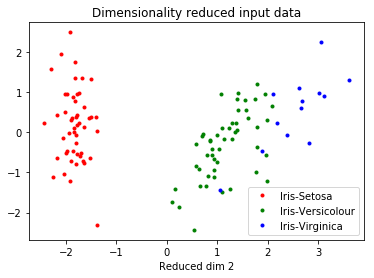

In [65]:
# Task 2: Reduce the dimension to two, and plot the data

dimred = "... add your code here!"

dimred.fit(X_)
T = dimred.transform(X_)

print(f"Input data shape      : {X_.shape}")
print(f"Transformed data shape: {T.shape}")

plt.figure()
for i in range(T.shape[0]):
    if y[i] == 0:
        h0, = plt.plot(T[i, 0], T[i, 1], '.', color="red")
    elif y[i] == 1:
        h1, = plt.plot(T[i, 0], T[i, 1], '.', color="green")
    else:  # y[i] == 2:
        h2, = plt.plot(T[i, 0], T[i, 1], '.', color="blue")
plt.xlabel("Reduced dim 1")
plt.xlabel("Reduced dim 2")
plt.title("Dimensionality reduced input data")
h0.set_label("Iris-Setosa")
h1.set_label("Iris-Versicolour")
h2.set_label("Iris-Virginica")
_ = plt.legend()

In [0]:
# Fit baseline model
model_baseline = sklearn.cluster.KMeans(
    n_clusters=3,
    init="k-means++",
    n_init=10,
    max_iter=300,
    tol=0.0001)
_ = model_baseline.fit(X_)

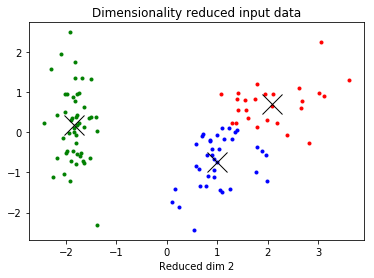

In [67]:
# Plot the cluster centers with the data labels from the clustering

yhat = model_baseline.predict(X_)

plt.figure()
for i in range(T.shape[0]):
    if yhat[i] == 0:
        plt.plot(T[i, 0], T[i, 1], '.', color="red")
    elif yhat[i] == 1:
        plt.plot(T[i, 0], T[i, 1], '.', color="green")
    else:  # yhat[i] == 2:
        plt.plot(T[i, 0], T[i, 1], '.', color="blue")

T_mu = dimred.transform(model_baseline.cluster_centers_)

for i in range(T_mu.shape[0]):
    plt.plot(T_mu[i, 0], T_mu[i, 1], 'x', markersize=20, color="black")

plt.xlabel("Reduced dim 1")
plt.xlabel("Reduced dim 2")
_ = plt.title("Dimensionality reduced input data")

In [0]:
# Task 3: Find a cluster model, and plot its results.
#  - Try to find one that performs better than K-means clustering